In [1]:
import os,random
os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["THEANO_FLAGS"]  = "device=gpu%d"%(1)
os.environ["MKL_THREADING_LAYER"] = "GNU"
import numpy as np
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import random, sys, keras

Using TensorFlow backend.


In [2]:
def deepsensing_network(in_shp = [2, 128], classes = ['busy' ,'idle']):
    K.set_image_dim_ordering('th')
    dr = 0.5
    model = models.Sequential()
    model.add(Reshape([1]+in_shp, input_shape=in_shp))
    model.add(ZeroPadding2D((0, 2)))
    model.add(Convolution2D(256, 1, 9, border_mode='valid', activation="relu", name="conv1", init='glorot_uniform'))
    model.add(Dropout(dr))
    model.add(ZeroPadding2D((0, 2)))
    model.add(Convolution2D(80, 2, 9, border_mode="valid", activation="relu", name="conv2", init='glorot_uniform'))
    model.add(Dropout(dr))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', init='he_normal', name="dense1"))
    model.add(Dropout(dr))
    model.add(Dense( len(classes), init='he_normal', name="dense2" ))
    model.add(Activation('softmax'))
    model.add(Reshape([len(classes)]))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

In [3]:
from util import dataset_load

datafile = 'radio_data_2018Aug03_03_46.data'
modelfile = 'QPSK.wts_model.h5'

[X_train, Y_train, X_test, Y_test] = dataset_load(datafile)

in_shp = [2,128]
classes = ['busy', 'idle']
batch_size = 1000
nb_epoch = 100

model = deepsensing_network(in_shp, classes)
     
history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, Y_test),
        callbacks = [
            keras.callbacks.ModelCheckpoint(modelfile, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
        ])

model.load_weights(modelfile)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 9), padding="valid", name="conv1", kernel_initializer="glorot_uniform", activation="relu")`
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(80, (2, 9), padding="valid", name="conv2", kernel_initializer="glorot_uniform", activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="he_normal", activation="relu", name="dense1")`
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="he_normal", name="dense2")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/di

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.7298 - val_loss: 0.6427
Epoch 2/100
 - 1s - loss: 0.5216 - val_loss: 0.3474
Epoch 3/100
 - 1s - loss: 0.1522 - val_loss: 1.6282e-04
Epoch 4/100
 - 1s - loss: 0.0057 - val_loss: 1.5511e-05
Epoch 5/100
 - 1s - loss: 0.0033 - val_loss: 3.9717e-07
Epoch 6/100
 - 1s - loss: 0.0019 - val_loss: 1.4299e-07
Epoch 7/100
 - 1s - loss: 2.8503e-04 - val_loss: 2.2326e-07
Epoch 8/100
 - 1s - loss: 4.4475e-04 - val_loss: 2.4092e-07
Epoch 9/100
 - 1s - loss: 7.8395e-04 - val_loss: 1.4333e-06
Epoch 10/100
 - 1s - loss: 1.6011e-04 - val_loss: 1.8210e-07
Epoch 11/100
 - 1s - loss: 6.9682e-06 - val_loss: 1.2223e-07
Epoch 12/100
 - 1s - loss: 4.3059e-05 - val_loss: 1.2284e-07
Epoch 13/100
 - 1s - loss: 7.9307e-05 - val_loss: 2.7900e-07
Epoch 14/100
 - 1s - loss: 3.7760e-04 - val_loss: 1.2298e-07
Epoch 15/100
 - 1s - loss: 5.2162e-04 - val_loss: 1.4953e-07
Epoch 16/100
 - 1s - loss: 9.4303e-06 - val_loss: 1.7081e-07


0.680694056641404 0.13016446048937025


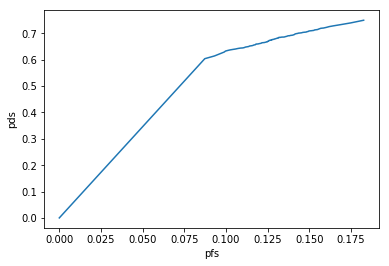

In [11]:
from util import  cal_roc, plot_roc, cal_pd_pf
import matplotlib.pyplot as plt

datafile = 'radio_data_2018Aug03_04_10.data'

[X_train, Y_train, X_test, Y_test] = dataset_load(datafile)

test_Y_hat = model.predict(X_test, batch_size=1000)

pd, pf = cal_pd_pf(X_test, Y_test, test_Y_hat)
print(pd, pf)

pds, pfs = cal_roc(X_test, Y_test, test_Y_hat)

plt.plot( pfs, pds)
plt.xlabel('pfs')
plt.ylabel('pds')
plt.show()